# Introduction

This notebook is a 'quick-start' for the [CGIAR Crop Yield Prediction Challenge](https://zindi.africa/competitions/cgiar-crop-yield-prediction-challenge). We'll take a look at the data, fit a quick model and make a submission, with hints at each stage for extra options to investigate.

Let's dive in!

# Setup

You can get the zip files from Zindi or add to your Google drive using the following links:

Test data: https://drive.google.com/file/d/1yTEgzn8JJn0mZmJ7NDUbwAB1WSzwRScB/view?usp=sharing

Training data: 
https://drive.google.com/file/d/1-0UNiBpvfdRq8rgUC3Kb22YPWP_YnoKj/view?usp=sharing

You'll also need the smaller files from Zindi (Train.csv, SampleSubmission.csv and bandnames.txt) which you can just upload using the files tab.

# Loading the data

The data isn't a simple table - instead we must read the inputs from individual .npy files. Here we'll load the dataframes, open a file or two and take a look at the format.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [3]:
# Train.csv has the Field_IDs needed to find the npy files
train = pd.read_csv("../data/Train.csv")
print(train.shape)
train.head()

(2977, 4)


,Field_ID,Year,Quality,Yield
0,MH2O0YH,2019,3,3.686
1,O9TURWL,2019,2,5.657
2,35AFSDD,2019,3,3.082
3,PM05EG9,2019,2,2.707
4,V7PZBCG,2019,2,2.679


Loading ../data/image_arrays_train/VT8VXJX.npy as an array
Array shape: (360, 41, 41)


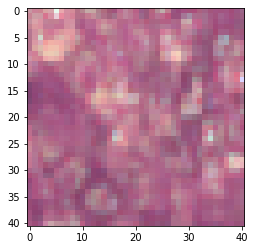

In [4]:
# Look at a sample:
fid = train['Field_ID'].sample().values[0]
fn = f'../data/image_arrays_train/{fid}.npy' # File name based on Field_ID
print(f'Loading {fn} as an array')
arr = np.load(fn) # Loading the data with numpy
print('Array shape:', arr.shape) # 360 bands, images 40 or 41px a side
rgb_jan = np.stack([arr[4], arr[3], arr[2]], axis=-1) # Combine three bands for viewing
rgb_jan = rgb_jan / np.max(rgb_jan) # Scale band values to (0, 1) for easy image display
plt.imshow(rgb_jan) # View with matplotlib

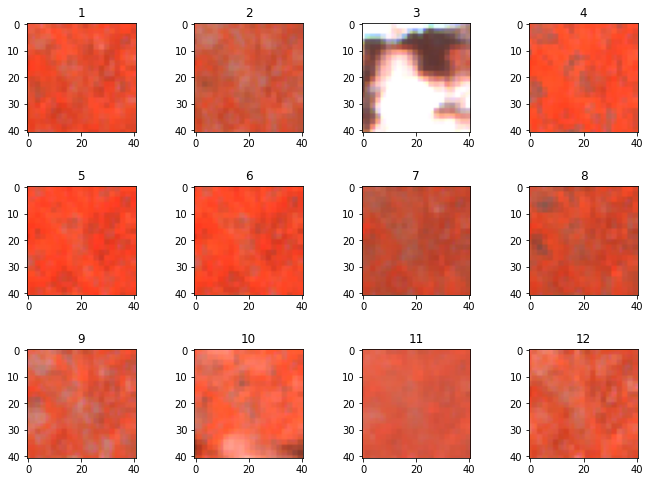

In [5]:
# View false colour images from each month in the year:
fig, axs = plt.subplots(3, 4, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(12):
  rgb = np.stack([arr[i*30 + 8], arr[i*30 + 4], arr[i*30 + 3]], axis=-1) # False colour (band 8, 4 and 3)
  rgb = rgb / 4000 # Scaling consistently 
  axs[i].imshow(rgb.clip(0, 1))
  axs[i].set_title(str(i+1))

What's with the white fluffy stuff? These are clouds - the bane of all remote sensing analysts...

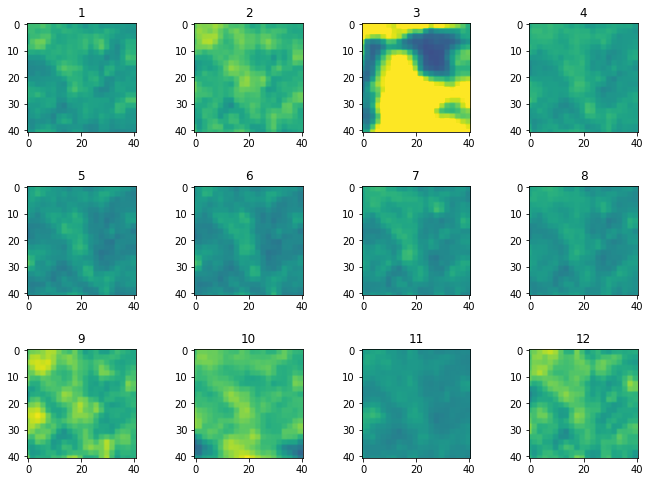

In [6]:
# Show the SWIR band (B12) where clouds have a high reflectance
fig, axs = plt.subplots(3, 4, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(12):
  cloud = arr[i*30 + 11]
  axs[i].imshow(cloud, vmin=0, vmax=4000)
  axs[i].set_title(str(i+1))

# Sampling from the images

There are some hard-coded band indexes in the examples above that won't have made sense - how did we know which bands were which?
There are 30 bands for each month. You can see the full list of bands with:

In [7]:
# band_names = [l.strip() for l in open('bandnames.txt', 'r').readlines()]
# print(band_names)
band_names = ['0_S2_B1', '0_S2_B2', '0_S2_B3', '0_S2_B4', '0_S2_B5', '0_S2_B6', '0_S2_B7', '0_S2_B8', '0_S2_B8A', '0_S2_B9', '0_S2_B10', '0_S2_B11', '0_S2_B12', '0_S2_QA10', '0_S2_QA20', '0_S2_QA60', '0_CLIM_aet', '0_CLIM_def', '0_CLIM_pdsi', '0_CLIM_pet', '0_CLIM_pr', '0_CLIM_ro', '0_CLIM_soil', '0_CLIM_srad', '0_CLIM_swe', '0_CLIM_tmmn', '0_CLIM_tmmx', '0_CLIM_vap', '0_CLIM_vpd', '0_CLIM_vs', '1_S2_B1', '1_S2_B2', '1_S2_B3', '1_S2_B4', '1_S2_B5', '1_S2_B6', '1_S2_B7', '1_S2_B8', '1_S2_B8A', '1_S2_B9', '1_S2_B10', '1_S2_B11', '1_S2_B12', '1_S2_QA10', '1_S2_QA20', '1_S2_QA60', '1_CLIM_aet', '1_CLIM_def', '1_CLIM_pdsi', '1_CLIM_pet', '1_CLIM_pr', '1_CLIM_ro', '1_CLIM_soil', '1_CLIM_srad', '1_CLIM_swe', '1_CLIM_tmmn', '1_CLIM_tmmx', '1_CLIM_vap', '1_CLIM_vpd', '1_CLIM_vs', '2_S2_B1', '2_S2_B2', '2_S2_B3', '2_S2_B4', '2_S2_B5', '2_S2_B6', '2_S2_B7', '2_S2_B8', '2_S2_B8A', '2_S2_B9', '2_S2_B10', '2_S2_B11', '2_S2_B12', '2_S2_QA10', '2_S2_QA20', '2_S2_QA60', '2_CLIM_aet', '2_CLIM_def', '2_CLIM_pdsi', '2_CLIM_pet', '2_CLIM_pr', '2_CLIM_ro', '2_CLIM_soil', '2_CLIM_srad', '2_CLIM_swe', '2_CLIM_tmmn', '2_CLIM_tmmx', '2_CLIM_vap', '2_CLIM_vpd', '2_CLIM_vs', '3_S2_B1', '3_S2_B2', '3_S2_B3', '3_S2_B4', '3_S2_B5', '3_S2_B6', '3_S2_B7', '3_S2_B8', '3_S2_B8A', '3_S2_B9', '3_S2_B10', '3_S2_B11', '3_S2_B12', '3_S2_QA10', '3_S2_QA20', '3_S2_QA60', '3_CLIM_aet', '3_CLIM_def', '3_CLIM_pdsi', '3_CLIM_pet', '3_CLIM_pr', '3_CLIM_ro', '3_CLIM_soil', '3_CLIM_srad', '3_CLIM_swe', '3_CLIM_tmmn', '3_CLIM_tmmx', '3_CLIM_vap', '3_CLIM_vpd', '3_CLIM_vs', '4_S2_B1', '4_S2_B2', '4_S2_B3', '4_S2_B4', '4_S2_B5', '4_S2_B6', '4_S2_B7', '4_S2_B8', '4_S2_B8A', '4_S2_B9', '4_S2_B10', '4_S2_B11', '4_S2_B12', '4_S2_QA10', '4_S2_QA20', '4_S2_QA60', '4_CLIM_aet', '4_CLIM_def', '4_CLIM_pdsi', '4_CLIM_pet', '4_CLIM_pr', '4_CLIM_ro', '4_CLIM_soil', '4_CLIM_srad', '4_CLIM_swe', '4_CLIM_tmmn', '4_CLIM_tmmx', '4_CLIM_vap', '4_CLIM_vpd', '4_CLIM_vs', '5_S2_B1', '5_S2_B2', '5_S2_B3', '5_S2_B4', '5_S2_B5', '5_S2_B6', '5_S2_B7', '5_S2_B8', '5_S2_B8A', '5_S2_B9', '5_S2_B10', '5_S2_B11', '5_S2_B12', '5_S2_QA10', '5_S2_QA20', '5_S2_QA60', '5_CLIM_aet', '5_CLIM_def', '5_CLIM_pdsi', '5_CLIM_pet', '5_CLIM_pr', '5_CLIM_ro', '5_CLIM_soil', '5_CLIM_srad', '5_CLIM_swe', '5_CLIM_tmmn', '5_CLIM_tmmx', '5_CLIM_vap', '5_CLIM_vpd', '5_CLIM_vs', '6_S2_B1', '6_S2_B2', '6_S2_B3', '6_S2_B4', '6_S2_B5', '6_S2_B6', '6_S2_B7', '6_S2_B8', '6_S2_B8A', '6_S2_B9', '6_S2_B10', '6_S2_B11', '6_S2_B12', '6_S2_QA10', '6_S2_QA20', '6_S2_QA60', '6_CLIM_aet', '6_CLIM_def', '6_CLIM_pdsi', '6_CLIM_pet', '6_CLIM_pr', '6_CLIM_ro', '6_CLIM_soil', '6_CLIM_srad', '6_CLIM_swe', '6_CLIM_tmmn', '6_CLIM_tmmx', '6_CLIM_vap', '6_CLIM_vpd', '6_CLIM_vs', '7_S2_B1', '7_S2_B2', '7_S2_B3', '7_S2_B4', '7_S2_B5', '7_S2_B6', '7_S2_B7', '7_S2_B8', '7_S2_B8A', '7_S2_B9', '7_S2_B10', '7_S2_B11', '7_S2_B12', '7_S2_QA10', '7_S2_QA20', '7_S2_QA60', '7_CLIM_aet', '7_CLIM_def', '7_CLIM_pdsi', '7_CLIM_pet', '7_CLIM_pr', '7_CLIM_ro', '7_CLIM_soil', '7_CLIM_srad', '7_CLIM_swe', '7_CLIM_tmmn', '7_CLIM_tmmx', '7_CLIM_vap', '7_CLIM_vpd', '7_CLIM_vs', '8_S2_B1', '8_S2_B2', '8_S2_B3', '8_S2_B4', '8_S2_B5', '8_S2_B6', '8_S2_B7', '8_S2_B8', '8_S2_B8A', '8_S2_B9', '8_S2_B10', '8_S2_B11', '8_S2_B12', '8_S2_QA10', '8_S2_QA20', '8_S2_QA60', '8_CLIM_aet', '8_CLIM_def', '8_CLIM_pdsi', '8_CLIM_pet', '8_CLIM_pr', '8_CLIM_ro', '8_CLIM_soil', '8_CLIM_srad', '8_CLIM_swe', '8_CLIM_tmmn', '8_CLIM_tmmx', '8_CLIM_vap', '8_CLIM_vpd', '8_CLIM_vs', '9_S2_B1', '9_S2_B2', '9_S2_B3', '9_S2_B4', '9_S2_B5', '9_S2_B6', '9_S2_B7', '9_S2_B8', '9_S2_B8A', '9_S2_B9', '9_S2_B10', '9_S2_B11', '9_S2_B12', '9_S2_QA10', '9_S2_QA20', '9_S2_QA60', '9_CLIM_aet', '9_CLIM_def', '9_CLIM_pdsi', '9_CLIM_pet', '9_CLIM_pr', '9_CLIM_ro', '9_CLIM_soil', '9_CLIM_srad', '9_CLIM_swe', '9_CLIM_tmmn', '9_CLIM_tmmx', '9_CLIM_vap', '9_CLIM_vpd', '9_CLIM_vs', '10_S2_B1', '10_S2_B2', '10_S2_B3', '10_S2_B4', '10_S2_B5', '10_S2_B6', '10_S2_B7', '10_S2_B8', '10_S2_B8A', '10_S2_B9', '10_S2_B10', '10_S2_B11', '10_S2_B12', '10_S2_QA10', '10_S2_QA20', '10_S2_QA60', '10_CLIM_aet', '10_CLIM_def', '10_CLIM_pdsi', '10_CLIM_pet', '10_CLIM_pr', '10_CLIM_ro', '10_CLIM_soil', '10_CLIM_srad', '10_CLIM_swe', '10_CLIM_tmmn', '10_CLIM_tmmx', '10_CLIM_vap', '10_CLIM_vpd', '10_CLIM_vs', '11_S2_B1', '11_S2_B2', '11_S2_B3', '11_S2_B4', '11_S2_B5', '11_S2_B6', '11_S2_B7', '11_S2_B8', '11_S2_B8A', '11_S2_B9', '11_S2_B10', '11_S2_B11', '11_S2_B12', '11_S2_QA10', '11_S2_QA20', '11_S2_QA60', '11_CLIM_aet', '11_CLIM_def', '11_CLIM_pdsi', '11_CLIM_pet', '11_CLIM_pr', '11_CLIM_ro', '11_CLIM_soil', '11_CLIM_srad', '11_CLIM_swe', '11_CLIM_tmmn', '11_CLIM_tmmx', '11_CLIM_vap', '11_CLIM_vpd', '11_CLIM_vs']

0_S2_B1 is band one from the Sentinel 2 image for January (month 0). They're ordered, so we know that the first image band in the array is 0_S2_B1...

You'll likely want to examine specific bands. Here's an example where we create a function to sample the center point (20, 20) for specified bands from each month:

In [8]:
def process_im(fid, folder='../data/image_arrays_train'):
  fn = f'{folder}/{fid}.npy'
  arr = np.load(fn)
  bands_of_interest = ['S2_B5', 'S2_B4', 'S2_B3', 'S2_B2', 'CLIM_pr', 'CLIM_soil']
  values = {}
  for month in range(12):
    bns = [str(month) + '_' + b for b in bands_of_interest] # Bands of interest for this month 
    idxs = np.where(np.isin(band_names, bns)) # Index of these bands
    vs = arr[idxs, 20, 20] # Sample the im at the center point
    for bn, v in zip(bns, vs[0]):
      values[bn] = v
  return values

# Example
# process_im('35AFSDD')

With this, we can sample the inputs for each field in train and use that to build a dataframe of input features:

In [9]:
# Make a new DF with the sampled values from each field 
train_sampled = pd.DataFrame([process_im(fid) for fid in train['Field_ID'].values])

# Add in the field ID and yield
train_sampled['Field_ID'] = train['Field_ID'].values
train_sampled['Yield'] = train['Yield'].values
train_sampled.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,...,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil,Field_ID,Yield
0,934,932,1173,1392,4,287,1015,1036,1397,1516,...,83,93,744,699,393,790,125,215,MH2O0YH,3.686
1,880,821,924,1116,4,287,933,873,1011,1152,...,78,96,703,524,323,420,126,215,O9TURWL,5.657
2,1016,1070,1357,1632,4,278,1108,1193,1588,1947,...,75,93,2935,2961,3598,4145,135,289,35AFSDD,3.082
3,777,784,639,1064,3,299,832,875,823,1237,...,86,95,7289,7389,8025,8057,121,189,PM05EG9,2.707
4,1081,1122,1162,1487,20,427,1046,1063,1133,1454,...,122,1123,1054,1097,789,1349,194,1214,V7PZBCG,2.679


# Fitting a model

Now that we have a way to get features from the inputs, we can fit a model and see how it does:

0:	learn: 1.7022042	test: 1.8431948	best: 1.8431948 (0)	total: 74ms	remaining: 42.8s
1:	learn: 1.6992104	test: 1.8401606	best: 1.8401606 (1)	total: 86.1ms	remaining: 24.9s
2:	learn: 1.6963612	test: 1.8372239	best: 1.8372239 (2)	total: 92.8ms	remaining: 17.8s
3:	learn: 1.6935148	test: 1.8346022	best: 1.8346022 (3)	total: 98.3ms	remaining: 14.1s
4:	learn: 1.6906914	test: 1.8323136	best: 1.8323136 (4)	total: 103ms	remaining: 11.8s
5:	learn: 1.6878974	test: 1.8296692	best: 1.8296692 (5)	total: 107ms	remaining: 10.3s
6:	learn: 1.6852624	test: 1.8273902	best: 1.8273902 (6)	total: 111ms	remaining: 9.1s
7:	learn: 1.6826163	test: 1.8247787	best: 1.8247787 (7)	total: 115ms	remaining: 8.23s
8:	learn: 1.6801108	test: 1.8226084	best: 1.8226084 (8)	total: 119ms	remaining: 7.54s
9:	learn: 1.6777392	test: 1.8203883	best: 1.8203883 (9)	total: 122ms	remaining: 6.97s
10:	learn: 1.6750720	test: 1.8178061	best: 1.8178061 (10)	total: 126ms	remaining: 6.5s
11:	learn: 1.6724884	test: 1.8155530	best: 1.8155530

94:	learn: 1.5397183	test: 1.6987120	best: 1.6987120 (94)	total: 467ms	remaining: 2.39s
95:	learn: 1.5387254	test: 1.6979492	best: 1.6979492 (95)	total: 471ms	remaining: 2.37s
96:	learn: 1.5377945	test: 1.6972885	best: 1.6972885 (96)	total: 474ms	remaining: 2.36s
97:	learn: 1.5369321	test: 1.6966307	best: 1.6966307 (97)	total: 478ms	remaining: 2.35s
98:	learn: 1.5359234	test: 1.6959118	best: 1.6959118 (98)	total: 481ms	remaining: 2.34s
99:	learn: 1.5349786	test: 1.6950929	best: 1.6950929 (99)	total: 486ms	remaining: 2.33s
100:	learn: 1.5338901	test: 1.6945797	best: 1.6945797 (100)	total: 491ms	remaining: 2.33s
101:	learn: 1.5327423	test: 1.6939027	best: 1.6939027 (101)	total: 497ms	remaining: 2.33s
102:	learn: 1.5317304	test: 1.6931904	best: 1.6931904 (102)	total: 508ms	remaining: 2.35s
103:	learn: 1.5308881	test: 1.6923965	best: 1.6923965 (103)	total: 512ms	remaining: 2.34s
104:	learn: 1.5299366	test: 1.6919381	best: 1.6919381 (104)	total: 519ms	remaining: 2.35s
105:	learn: 1.5290031	

189:	learn: 1.4698003	test: 1.6548030	best: 1.6548030 (189)	total: 855ms	remaining: 1.75s
190:	learn: 1.4694317	test: 1.6545748	best: 1.6545748 (190)	total: 860ms	remaining: 1.75s
191:	learn: 1.4691025	test: 1.6543473	best: 1.6543473 (191)	total: 864ms	remaining: 1.75s
192:	learn: 1.4683934	test: 1.6538944	best: 1.6538944 (192)	total: 872ms	remaining: 1.75s
193:	learn: 1.4679091	test: 1.6537553	best: 1.6537553 (193)	total: 877ms	remaining: 1.75s
194:	learn: 1.4673988	test: 1.6533587	best: 1.6533587 (194)	total: 881ms	remaining: 1.74s
195:	learn: 1.4667783	test: 1.6531201	best: 1.6531201 (195)	total: 890ms	remaining: 1.74s
196:	learn: 1.4660539	test: 1.6527948	best: 1.6527948 (196)	total: 896ms	remaining: 1.74s
197:	learn: 1.4656116	test: 1.6525681	best: 1.6525681 (197)	total: 903ms	remaining: 1.74s
198:	learn: 1.4650031	test: 1.6520265	best: 1.6520265 (198)	total: 910ms	remaining: 1.74s
199:	learn: 1.4645144	test: 1.6517786	best: 1.6517786 (199)	total: 913ms	remaining: 1.74s
200:	learn

283:	learn: 1.4286143	test: 1.6372412	best: 1.6372412 (283)	total: 1.25s	remaining: 1.3s
284:	learn: 1.4282258	test: 1.6372395	best: 1.6372395 (284)	total: 1.25s	remaining: 1.3s
285:	learn: 1.4279406	test: 1.6372104	best: 1.6372104 (285)	total: 1.26s	remaining: 1.29s
286:	learn: 1.4275951	test: 1.6370656	best: 1.6370656 (286)	total: 1.26s	remaining: 1.29s
287:	learn: 1.4272997	test: 1.6370360	best: 1.6370360 (287)	total: 1.26s	remaining: 1.28s
288:	learn: 1.4269583	test: 1.6368919	best: 1.6368919 (288)	total: 1.27s	remaining: 1.28s
289:	learn: 1.4265847	test: 1.6368576	best: 1.6368576 (289)	total: 1.27s	remaining: 1.27s
290:	learn: 1.4261468	test: 1.6367947	best: 1.6367947 (290)	total: 1.28s	remaining: 1.27s
291:	learn: 1.4257729	test: 1.6365165	best: 1.6365165 (291)	total: 1.28s	remaining: 1.27s
292:	learn: 1.4252888	test: 1.6362550	best: 1.6362550 (292)	total: 1.29s	remaining: 1.27s
293:	learn: 1.4249319	test: 1.6361242	best: 1.6361242 (293)	total: 1.3s	remaining: 1.26s
294:	learn: 1

380:	learn: 1.3947638	test: 1.6284445	best: 1.6284147 (378)	total: 1.64s	remaining: 858ms
381:	learn: 1.3944899	test: 1.6284314	best: 1.6284147 (378)	total: 1.65s	remaining: 854ms
382:	learn: 1.3942576	test: 1.6284815	best: 1.6284147 (378)	total: 1.65s	remaining: 849ms
383:	learn: 1.3938850	test: 1.6284433	best: 1.6284147 (378)	total: 1.66s	remaining: 846ms
384:	learn: 1.3936971	test: 1.6284326	best: 1.6284147 (378)	total: 1.66s	remaining: 842ms
385:	learn: 1.3932860	test: 1.6283460	best: 1.6283460 (385)	total: 1.66s	remaining: 837ms
386:	learn: 1.3930229	test: 1.6282490	best: 1.6282490 (386)	total: 1.67s	remaining: 833ms
387:	learn: 1.3926547	test: 1.6281525	best: 1.6281525 (387)	total: 1.68s	remaining: 829ms
388:	learn: 1.3923869	test: 1.6281508	best: 1.6281508 (388)	total: 1.68s	remaining: 825ms
389:	learn: 1.3920949	test: 1.6281191	best: 1.6281191 (389)	total: 1.68s	remaining: 820ms
390:	learn: 1.3919377	test: 1.6280185	best: 1.6280185 (390)	total: 1.69s	remaining: 816ms
391:	learn

506:	learn: 1.3564953	test: 1.6260134	best: 1.6257852 (498)	total: 2.23s	remaining: 321ms
507:	learn: 1.3562946	test: 1.6260749	best: 1.6257852 (498)	total: 2.23s	remaining: 316ms
508:	learn: 1.3561098	test: 1.6260635	best: 1.6257852 (498)	total: 2.24s	remaining: 312ms
509:	learn: 1.3558072	test: 1.6261743	best: 1.6257852 (498)	total: 2.24s	remaining: 307ms
510:	learn: 1.3555251	test: 1.6261101	best: 1.6257852 (498)	total: 2.24s	remaining: 303ms
511:	learn: 1.3553033	test: 1.6260952	best: 1.6257852 (498)	total: 2.25s	remaining: 299ms
512:	learn: 1.3550598	test: 1.6260413	best: 1.6257852 (498)	total: 2.26s	remaining: 296ms
513:	learn: 1.3546770	test: 1.6259208	best: 1.6257852 (498)	total: 2.27s	remaining: 292ms
514:	learn: 1.3544110	test: 1.6259133	best: 1.6257852 (498)	total: 2.28s	remaining: 287ms
515:	learn: 1.3540677	test: 1.6259271	best: 1.6257852 (498)	total: 2.28s	remaining: 283ms
516:	learn: 1.3537751	test: 1.6259158	best: 1.6257852 (498)	total: 2.28s	remaining: 278ms
517:	learn

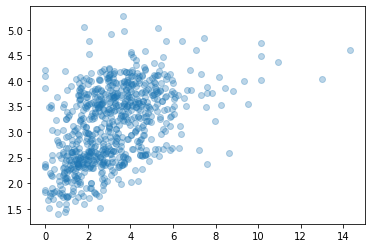

In [10]:
# catboost regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

# Split the data
X, y  = train_sampled[train_sampled.columns[:-2]], train_sampled['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
cbr = CatBoostRegressor(learning_rate=0.01, iterations=580)
cbr.fit(X_train, y_train, eval_set=(X_test, y_test))
# Score with RMSE
print('Score:', mean_squared_error(y_test, cbr.predict(X_test), squared=False))

# Plot pred vs actual for the test set:
plt.scatter(y_test, cbr.predict(X_test), alpha=0.3)

Score: 1.556196721600194


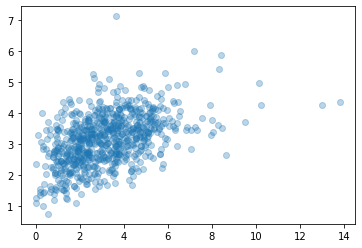

In [11]:
# catboost with scaled data
from sklearn.preprocessing import MinMaxScaler


# Split the data
X, y  = train_sampled[train_sampled.columns[:-2]], train_sampled['Yield']

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
cbr = CatBoostRegressor(verbose=False)
cbr.fit(X_train, y_train, eval_set=(X_test, y_test))
# Score with RMSE
print('Score:', mean_squared_error(y_test, cbr.predict(X_test), squared=False))

# Plot pred vs actual for the test set:
plt.scatter(y_test, cbr.predict(X_test), alpha=0.3)

0:	learn: 1.7322063	test: 1.7597077	best: 1.7597077 (0)	total: 5.33ms	remaining: 5.33s
1:	learn: 1.7291854	test: 1.7574034	best: 1.7574034 (1)	total: 9.86ms	remaining: 4.92s
2:	learn: 1.7267642	test: 1.7553565	best: 1.7553565 (2)	total: 13.9ms	remaining: 4.63s
3:	learn: 1.7240473	test: 1.7534094	best: 1.7534094 (3)	total: 18.4ms	remaining: 4.57s
4:	learn: 1.7215375	test: 1.7514812	best: 1.7514812 (4)	total: 22.7ms	remaining: 4.51s
5:	learn: 1.7190786	test: 1.7497582	best: 1.7497582 (5)	total: 26.1ms	remaining: 4.32s
6:	learn: 1.7166007	test: 1.7476773	best: 1.7476773 (6)	total: 29ms	remaining: 4.11s
7:	learn: 1.7137318	test: 1.7456877	best: 1.7456877 (7)	total: 31.8ms	remaining: 3.94s
8:	learn: 1.7112802	test: 1.7436938	best: 1.7436938 (8)	total: 34.4ms	remaining: 3.79s
9:	learn: 1.7087932	test: 1.7420264	best: 1.7420264 (9)	total: 36.8ms	remaining: 3.64s
10:	learn: 1.7062249	test: 1.7399978	best: 1.7399978 (10)	total: 38.9ms	remaining: 3.49s
11:	learn: 1.7039049	test: 1.7384390	best: 

161:	learn: 1.5268952	test: 1.6218513	best: 1.6218513 (161)	total: 393ms	remaining: 2.04s
162:	learn: 1.5262563	test: 1.6216547	best: 1.6216547 (162)	total: 397ms	remaining: 2.04s
163:	learn: 1.5258708	test: 1.6214677	best: 1.6214677 (163)	total: 400ms	remaining: 2.04s
164:	learn: 1.5253270	test: 1.6211255	best: 1.6211255 (164)	total: 402ms	remaining: 2.04s
165:	learn: 1.5245007	test: 1.6206465	best: 1.6206465 (165)	total: 405ms	remaining: 2.03s
166:	learn: 1.5240387	test: 1.6204263	best: 1.6204263 (166)	total: 407ms	remaining: 2.03s
167:	learn: 1.5232132	test: 1.6200116	best: 1.6200116 (167)	total: 411ms	remaining: 2.03s
168:	learn: 1.5225260	test: 1.6199018	best: 1.6199018 (168)	total: 414ms	remaining: 2.03s
169:	learn: 1.5219042	test: 1.6195824	best: 1.6195824 (169)	total: 417ms	remaining: 2.04s
170:	learn: 1.5213103	test: 1.6192478	best: 1.6192478 (170)	total: 419ms	remaining: 2.03s
171:	learn: 1.5207981	test: 1.6189267	best: 1.6189267 (171)	total: 421ms	remaining: 2.03s
172:	learn

260:	learn: 1.4806814	test: 1.6029080	best: 1.6029080 (260)	total: 587ms	remaining: 1.66s
261:	learn: 1.4803662	test: 1.6028725	best: 1.6028725 (261)	total: 590ms	remaining: 1.66s
262:	learn: 1.4800598	test: 1.6027527	best: 1.6027527 (262)	total: 593ms	remaining: 1.66s
263:	learn: 1.4797509	test: 1.6026263	best: 1.6026263 (263)	total: 596ms	remaining: 1.66s
264:	learn: 1.4793896	test: 1.6026251	best: 1.6026251 (264)	total: 598ms	remaining: 1.66s
265:	learn: 1.4790907	test: 1.6025937	best: 1.6025937 (265)	total: 601ms	remaining: 1.66s
266:	learn: 1.4787943	test: 1.6024641	best: 1.6024641 (266)	total: 603ms	remaining: 1.66s
267:	learn: 1.4785193	test: 1.6023151	best: 1.6023151 (267)	total: 605ms	remaining: 1.65s
268:	learn: 1.4782039	test: 1.6021780	best: 1.6021780 (268)	total: 607ms	remaining: 1.65s
269:	learn: 1.4778245	test: 1.6020656	best: 1.6020656 (269)	total: 609ms	remaining: 1.65s
270:	learn: 1.4774008	test: 1.6018982	best: 1.6018982 (270)	total: 611ms	remaining: 1.64s
271:	learn

356:	learn: 1.4512687	test: 1.5957371	best: 1.5957371 (356)	total: 777ms	remaining: 1.4s
357:	learn: 1.4509479	test: 1.5956899	best: 1.5956899 (357)	total: 780ms	remaining: 1.4s
358:	learn: 1.4507479	test: 1.5955726	best: 1.5955726 (358)	total: 783ms	remaining: 1.4s
359:	learn: 1.4504596	test: 1.5955096	best: 1.5955096 (359)	total: 785ms	remaining: 1.39s
360:	learn: 1.4502272	test: 1.5954191	best: 1.5954191 (360)	total: 786ms	remaining: 1.39s
361:	learn: 1.4500304	test: 1.5954317	best: 1.5954191 (360)	total: 788ms	remaining: 1.39s
362:	learn: 1.4498949	test: 1.5954108	best: 1.5954108 (362)	total: 790ms	remaining: 1.39s
363:	learn: 1.4497597	test: 1.5953482	best: 1.5953482 (363)	total: 793ms	remaining: 1.39s
364:	learn: 1.4494896	test: 1.5951896	best: 1.5951896 (364)	total: 795ms	remaining: 1.38s
365:	learn: 1.4491071	test: 1.5950418	best: 1.5950418 (365)	total: 798ms	remaining: 1.38s
366:	learn: 1.4487548	test: 1.5950754	best: 1.5950418 (365)	total: 802ms	remaining: 1.38s
367:	learn: 1

455:	learn: 1.4256331	test: 1.5898728	best: 1.5898389 (453)	total: 969ms	remaining: 1.16s
456:	learn: 1.4253963	test: 1.5896939	best: 1.5896939 (456)	total: 971ms	remaining: 1.15s
457:	learn: 1.4250909	test: 1.5895886	best: 1.5895886 (457)	total: 973ms	remaining: 1.15s
458:	learn: 1.4246485	test: 1.5895338	best: 1.5895338 (458)	total: 974ms	remaining: 1.15s
459:	learn: 1.4244409	test: 1.5893953	best: 1.5893953 (459)	total: 976ms	remaining: 1.15s
460:	learn: 1.4243176	test: 1.5894102	best: 1.5893953 (459)	total: 979ms	remaining: 1.14s
461:	learn: 1.4241058	test: 1.5893845	best: 1.5893845 (461)	total: 981ms	remaining: 1.14s
462:	learn: 1.4238376	test: 1.5893861	best: 1.5893845 (461)	total: 985ms	remaining: 1.14s
463:	learn: 1.4235520	test: 1.5893431	best: 1.5893431 (463)	total: 987ms	remaining: 1.14s
464:	learn: 1.4232015	test: 1.5893307	best: 1.5893307 (464)	total: 991ms	remaining: 1.14s
465:	learn: 1.4228945	test: 1.5893371	best: 1.5893307 (464)	total: 994ms	remaining: 1.14s
466:	learn

565:	learn: 1.4017279	test: 1.5864440	best: 1.5864086 (562)	total: 1.35s	remaining: 1.03s
566:	learn: 1.4014511	test: 1.5864181	best: 1.5864086 (562)	total: 1.35s	remaining: 1.03s
567:	learn: 1.4012492	test: 1.5863788	best: 1.5863788 (567)	total: 1.36s	remaining: 1.03s
568:	learn: 1.4009549	test: 1.5863779	best: 1.5863779 (568)	total: 1.36s	remaining: 1.03s
569:	learn: 1.4007943	test: 1.5863722	best: 1.5863722 (569)	total: 1.37s	remaining: 1.03s
570:	learn: 1.4005157	test: 1.5863054	best: 1.5863054 (570)	total: 1.37s	remaining: 1.03s
571:	learn: 1.4004172	test: 1.5863033	best: 1.5863033 (571)	total: 1.37s	remaining: 1.03s
572:	learn: 1.4001759	test: 1.5863113	best: 1.5863033 (571)	total: 1.38s	remaining: 1.03s
573:	learn: 1.3999275	test: 1.5863275	best: 1.5863033 (571)	total: 1.38s	remaining: 1.03s
574:	learn: 1.3997115	test: 1.5862216	best: 1.5862216 (574)	total: 1.39s	remaining: 1.03s
575:	learn: 1.3994880	test: 1.5862029	best: 1.5862029 (575)	total: 1.39s	remaining: 1.02s
576:	learn

732:	learn: 1.3652620	test: 1.5815957	best: 1.5815299 (731)	total: 1.73s	remaining: 630ms
733:	learn: 1.3649967	test: 1.5815464	best: 1.5815299 (731)	total: 1.73s	remaining: 627ms
734:	learn: 1.3648214	test: 1.5815563	best: 1.5815299 (731)	total: 1.73s	remaining: 625ms
735:	learn: 1.3647006	test: 1.5815841	best: 1.5815299 (731)	total: 1.73s	remaining: 622ms
736:	learn: 1.3645604	test: 1.5814949	best: 1.5814949 (736)	total: 1.74s	remaining: 619ms
737:	learn: 1.3642873	test: 1.5814950	best: 1.5814949 (736)	total: 1.74s	remaining: 617ms
738:	learn: 1.3639740	test: 1.5814347	best: 1.5814347 (738)	total: 1.74s	remaining: 614ms
739:	learn: 1.3638880	test: 1.5814060	best: 1.5814060 (739)	total: 1.74s	remaining: 612ms
740:	learn: 1.3636979	test: 1.5814888	best: 1.5814060 (739)	total: 1.74s	remaining: 609ms
741:	learn: 1.3634503	test: 1.5814833	best: 1.5814060 (739)	total: 1.75s	remaining: 607ms
742:	learn: 1.3632406	test: 1.5814143	best: 1.5814060 (739)	total: 1.75s	remaining: 605ms
743:	learn

834:	learn: 1.3447751	test: 1.5804780	best: 1.5803915 (816)	total: 1.92s	remaining: 380ms
835:	learn: 1.3446726	test: 1.5804913	best: 1.5803915 (816)	total: 1.92s	remaining: 377ms
836:	learn: 1.3444318	test: 1.5804400	best: 1.5803915 (816)	total: 1.92s	remaining: 375ms
837:	learn: 1.3442793	test: 1.5804541	best: 1.5803915 (816)	total: 1.93s	remaining: 372ms
838:	learn: 1.3442008	test: 1.5804200	best: 1.5803915 (816)	total: 1.93s	remaining: 370ms
839:	learn: 1.3438962	test: 1.5804482	best: 1.5803915 (816)	total: 1.93s	remaining: 368ms
840:	learn: 1.3436071	test: 1.5803620	best: 1.5803620 (840)	total: 1.93s	remaining: 365ms
841:	learn: 1.3434201	test: 1.5803433	best: 1.5803433 (841)	total: 1.94s	remaining: 363ms
842:	learn: 1.3433367	test: 1.5803414	best: 1.5803414 (842)	total: 1.94s	remaining: 361ms
843:	learn: 1.3432213	test: 1.5803251	best: 1.5803251 (843)	total: 1.94s	remaining: 358ms
844:	learn: 1.3430036	test: 1.5802906	best: 1.5802906 (844)	total: 1.94s	remaining: 356ms
845:	learn

977:	learn: 1.3156362	test: 1.5788240	best: 1.5788007 (971)	total: 2.3s	remaining: 51.8ms
978:	learn: 1.3153607	test: 1.5788264	best: 1.5788007 (971)	total: 2.31s	remaining: 49.5ms
979:	learn: 1.3151101	test: 1.5787813	best: 1.5787813 (979)	total: 2.31s	remaining: 47.2ms
980:	learn: 1.3148786	test: 1.5787640	best: 1.5787640 (980)	total: 2.32s	remaining: 44.9ms
981:	learn: 1.3146768	test: 1.5787661	best: 1.5787640 (980)	total: 2.32s	remaining: 42.6ms
982:	learn: 1.3144525	test: 1.5787811	best: 1.5787640 (980)	total: 2.33s	remaining: 40.3ms
983:	learn: 1.3142609	test: 1.5787021	best: 1.5787021 (983)	total: 2.33s	remaining: 37.9ms
984:	learn: 1.3140322	test: 1.5787547	best: 1.5787021 (983)	total: 2.33s	remaining: 35.5ms
985:	learn: 1.3138727	test: 1.5788010	best: 1.5787021 (983)	total: 2.34s	remaining: 33.2ms
986:	learn: 1.3136474	test: 1.5789281	best: 1.5787021 (983)	total: 2.34s	remaining: 30.9ms
987:	learn: 1.3134660	test: 1.5788516	best: 1.5787021 (983)	total: 2.35s	remaining: 28.5ms


,Field_ID,Yield
0,E9UZCEA,3.702349
1,1WGGS1Q,3.702349
2,EG2KXE2,3.702349
3,HC3GQXF,3.702349
4,7AK6GFK,3.702349


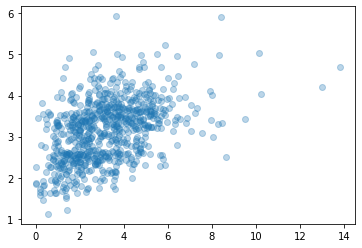

In [12]:
# using auto encoder
from tensorflow.keras.models import load_model


# scale the data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

# load encoder'
encoder = load_model("../models/encoder.h5", compile=False)
X_train_encoder = encoder.predict(X_train)
X_test_encoder = encoder.predict(X_test)

# define the model
cbr1 = CatBoostRegressor(learning_rate=0.01)

cbr1.fit(X_train_encoder, y_train, eval_set=(X_test_encoder, y_test))

# Score with RMSE
print('Score:', mean_squared_error(y_test, cbr1.predict(X_test_encoder), squared=False))

# Plot pred vs actual for the test set:
plt.scatter(y_test, cbr1.predict(X_test_encoder), alpha=0.3)

# Load the sample submission file
ss = pd.read_csv('../data/SampleSubmission.csv')

# Prep the data, using the same method we did for train
test_sampled = pd.DataFrame([process_im(fid, folder='../data/image_arrays_test') for fid in ss['Field_ID'].values])

# Get model predictions
preds = cbr1.predict(test_sampled)

# Store them in the submission dataframe and save
ss['Yield'] = preds
ss.to_csv('Sub.csv', index=False)
ss.head()

|# Saving Preds

Once we're happy with how we generate our inputs, we must process the test fields in the same way and save predictions. Here it is, condensed. Note the Field_IDs from the sample submission are used, and the same `process_im` function prepares the inputs, this time looking for .npy files in the 'image_arrays_test' folder. 

In [14]:
# Load the sample submission file
ss = pd.read_csv('../data/SampleSubmission.csv')

# Prep the data, using the same method we did for train
test_sampled = pd.DataFrame([process_im(fid, folder='../data/image_arrays_test') for fid in ss['Field_ID'].values])

# scale the data
t = MinMaxScaler()
t.fit(test_sampled)
test_sampled = t.transform(test_sampled)

# load encoder'
encoder = load_model("../models/encoder.h5", compile=False)
test_sampled = encoder.predict(test_sampled)

# Get model predictions
preds = cbr1.predict(test_sampled)

# Store them in the submission dataframe and save
ss['Yield'] = preds
ss.to_csv('../submissions/Sub.csv', index=False)
ss.head()

,Field_ID,Yield
0,E9UZCEA,2.455871
1,1WGGS1Q,2.827707
2,EG2KXE2,2.813042
3,HC3GQXF,2.662833
4,7AK6GFK,2.397864


## conclusion

catboostregressor doesnt reduce rmse try hyperparameter optimization to see if it improves.
cbr 1.62
cbr + scaled data 1.
